<a href="https://colab.research.google.com/github/ShaheenAfroz13/trashsort-upflairs/blob/main/garbage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import random

In [3]:
# Image handling and preprocessing
import cv2
from PIL import Image, ImageEnhance

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [7]:
folder = '/content/drive/My Drive/garbageclassifier'

In [8]:
#directories in folder
for label in os.listdir(folder):
  print(label)

paper
metal
glass
biological
cardboard
plastic


In [9]:
#Rezise images.. (width,height) to keep all images a certain size for easy  processing
img_size = (128, 128)

In [10]:
images = []
labels = []

In [11]:
# Loop through all class folders
for class_name in os.listdir(folder):
    class_path = os.path.join(folder, class_name)
    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Read and process image
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip if corrupted

        img_resized = cv2.resize(img, img_size)
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plt

        images.append(img_rgb)
        labels.append(class_name)

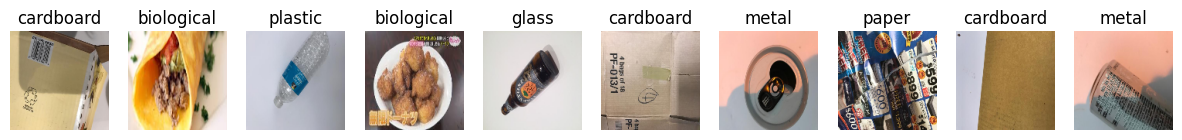

In [12]:
# Randomly show 10 images
num_show = 10
sample_indices = random.sample(range(len(images)), num_show)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_show, i + 1)
    plt.imshow(images[idx])
    plt.title(labels[idx])
    plt.axis('off')
plt.show()

In [13]:
# Convert images to NumPy array and normalize
X = np.array(images) / 255.0
#y=labels

In [14]:
# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
# One-hot encode for classification
y = to_categorical(y_encoded)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [16]:
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting

    # Output layer
    Dense(y_train.shape[1], activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 993ms/step - accuracy: 0.2032 - loss: 2.2142 - val_accuracy: 0.1901 - val_loss: 1.7040
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 917ms/step - accuracy: 0.2515 - loss: 1.6550 - val_accuracy: 0.3884 - val_loss: 1.4050
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 945ms/step - accuracy: 0.4097 - loss: 1.4630 - val_accuracy: 0.5537 - val_loss: 1.2622
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 964ms/step - accuracy: 0.4708 - loss: 1.3847 - val_accuracy: 0.5289 - val_loss: 1.2275
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 927ms/step - accuracy: 0.5412 - loss: 1.2312 - val_accuracy: 0.5537 - val_loss: 1.1101
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5403 - loss: 1.2785 - val_accuracy: 0.5124 - val_loss: 1.2916
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 947ms/step - accuracy: 0.5605 - loss: 1.1973 - val_accuracy: 0.5124 - val_loss: 1.1180
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 925ms/step - accuracy: 0.5926 - loss: 1.0819 - val_accurac

In [20]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.5853 - loss: 1.4844
Test Accuracy: 61.16%


In [21]:
model.save('model.h5')

In [22]:
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>